In [13]:
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

Check data read the column names didnt save changed

In [14]:
train4 = pd.read_pickle("data/sendy3.pkl")
train4.head()

order_no       user_id vehicle_type platform_type customer_type  \
0   Order_No_4211   User_Id_633         Bike             3      Business   
1  Order_No_25375  User_Id_2285         Bike             3      Personal   
2   Order_No_1899   User_Id_265         Bike             3      Business   
3   Order_No_9336  User_Id_1402         Bike             3      Business   
4  Order_No_27883  User_Id_1737         Bike             1      Personal   

  placed_day placed_wkday         placed_time confirmed_day confirmed_wkday  \
0          9            5 1900-01-01 09:35:46             9               5   
1         12            5 1900-01-01 11:16:16            12               5   
2         30            2 1900-01-01 12:39:25            30               2   
3         15            5 1900-01-01 09:25:34            15               5   
4         13            1 1900-01-01 09:55:18            13               1   

   ...   Age Average_Rating No_of_Ratings pickup_hr pickup_hr_type  \
0  ...  1309           13.8           549        10   Active Hours   
1  ...   339           13.6            69        11   Active Hours   
2  ...   242           12.5           114        12   Active Hours   
3  ...   283           14.5           113         9   Active Hours   
4  ...   872           14.1           533        10   Active Hours   

  delivered_hr delivered_hr_type pickup_wkday_type  speed_ms speed_type  
0           10      Active Hours           Weekday  5.369128       slow  
1           12      Active Hours           Weekday  8.028098       slow  
2           13      Active Hours           Weekday  6.593407       slow  
3           10      Active Hours           Weekday  6.711409       slow  
4           10      Active Hours           Weekday  7.413509       slow  

[5 rows x 39 columns]

In [15]:
train4.columns

Index(['order_no', 'user_id', 'vehicle_type', 'platform_type', 'customer_type',
       'placed_day', 'placed_wkday', 'placed_time', 'confirmed_day',
       'confirmed_wkday', 'confirmed_time', 'arrive_pickup_day',
       'arrive_pickup_wkday', 'arrive_pickup_time', 'pickup_day',
       'pickup_wkday', 'pickup_time', 'delivered_day', 'delivered_wkday',
       'delivered_time', 'distance_covered_km', 'temp', 'pickup_lat',
       'pickup_long', 'delivered_lat', 'delivered_long', 'Rider Id',
       'time_pickup_to_delivered', 'No_Of_Orders', 'Age', 'Average_Rating',
       'No_of_Ratings', 'pickup_hr', 'pickup_hr_type', 'delivered_hr',
       'delivered_hr_type', 'pickup_wkday_type', 'speed_ms', 'speed_type'],
      dtype='object')

In [18]:
# Dropping date/time columns
drop_columns = ['placed_day', 'placed_wkday', 'placed_time', 'confirmed_day',
       'confirmed_wkday', 'confirmed_time', 'arrive_pickup_day',
       'arrive_pickup_wkday', 'arrive_pickup_time', 'pickup_day',
       'pickup_wkday', 'pickup_time', 'delivered_day', 'delivered_wkday',
       'delivered_time']

train4.drop(columns=drop_columns, inplace=True)

In [19]:
train4.head()

order_no       user_id vehicle_type platform_type customer_type  \
0   Order_No_4211   User_Id_633         Bike             3      Business   
1  Order_No_25375  User_Id_2285         Bike             3      Personal   
2   Order_No_1899   User_Id_265         Bike             3      Business   
3   Order_No_9336  User_Id_1402         Bike             3      Business   
4  Order_No_27883  User_Id_1737         Bike             1      Personal   

   distance_covered_km       temp  pickup_lat  pickup_long  delivered_lat  \
0                    4  20.400000   -1.317755    36.830370      -1.300406   
1                   16  26.400000   -1.351453    36.899315      -1.295004   
2                    3  23.258889   -1.308284    36.843419      -1.300921   
3                    9  19.200000   -1.281301    36.832396      -1.257147   
4                    9  15.400000   -1.266597    36.792118      -1.295041   

   ...   Age Average_Rating  No_of_Ratings  pickup_hr  pickup_hr_type  \
0  ...  1309           13.8            549         10    Active Hours   
1  ...   339           13.6             69         11    Active Hours   
2  ...   242           12.5            114         12    Active Hours   
3  ...   283           14.5            113          9    Active Hours   
4  ...   872           14.1            533         10    Active Hours   

   delivered_hr  delivered_hr_type  pickup_wkday_type  speed_ms  speed_type  
0            10       Active Hours            Weekday  5.369128        slow  
1            12       Active Hours            Weekday  8.028098        slow  
2            13       Active Hours            Weekday  6.593407        slow  
3            10       Active Hours            Weekday  6.711409        slow  
4            10       Active Hours            Weekday  7.413509        slow  

[5 rows x 24 columns]

In [21]:
def numerical_dummy_variables(df):
    # Creating dummy variables for platforms 1, 2, 3. They will all be 0 for
    # platform 4.
    for i in range(1, 4):
        plat_str = "platform" + str(i)
        df[plat_str] = 0
        df.loc[df.platform == i, plat_str] = 1
        
    # Creating dummy variable for personal_or_business (1 if personal 0 if business)
    df["personal"] = 0
    df.loc[df.customer_type == "Personal", "personal"] = 1

numerical_dummy_variables(train4)

AttributeError: 'DataFrame' object has no attribute 'platform'

In [22]:
train4.shape

(17764, 25)

In [23]:
train.dtypes

order_no                            object
user_id                             object
vehicle_type                        object
platform_type                       object
customer_type                       object
placed_day                          object
placed_wkday                        object
placed_time                 datetime64[ns]
confirmed_day                       object
confirmed_wkday                     object
confirmed_time              datetime64[ns]
arrive_pickup_day                   object
arrive_pickup_wkday                 object
arrive_pickup_time          datetime64[ns]
pickup_day                          object
pickup_wkday                        object
pickup_time                 datetime64[ns]
delivered_day                       object
delivered_wkday                     object
delivered_time              datetime64[ns]
distance_covered_km                  int64
temp                               float64
pickup_lat                         float64
pickup_long

#### Step 1.

In [ ]:
Modeling objective would be to predict Delivery Time based on other variables. Regression Problem.

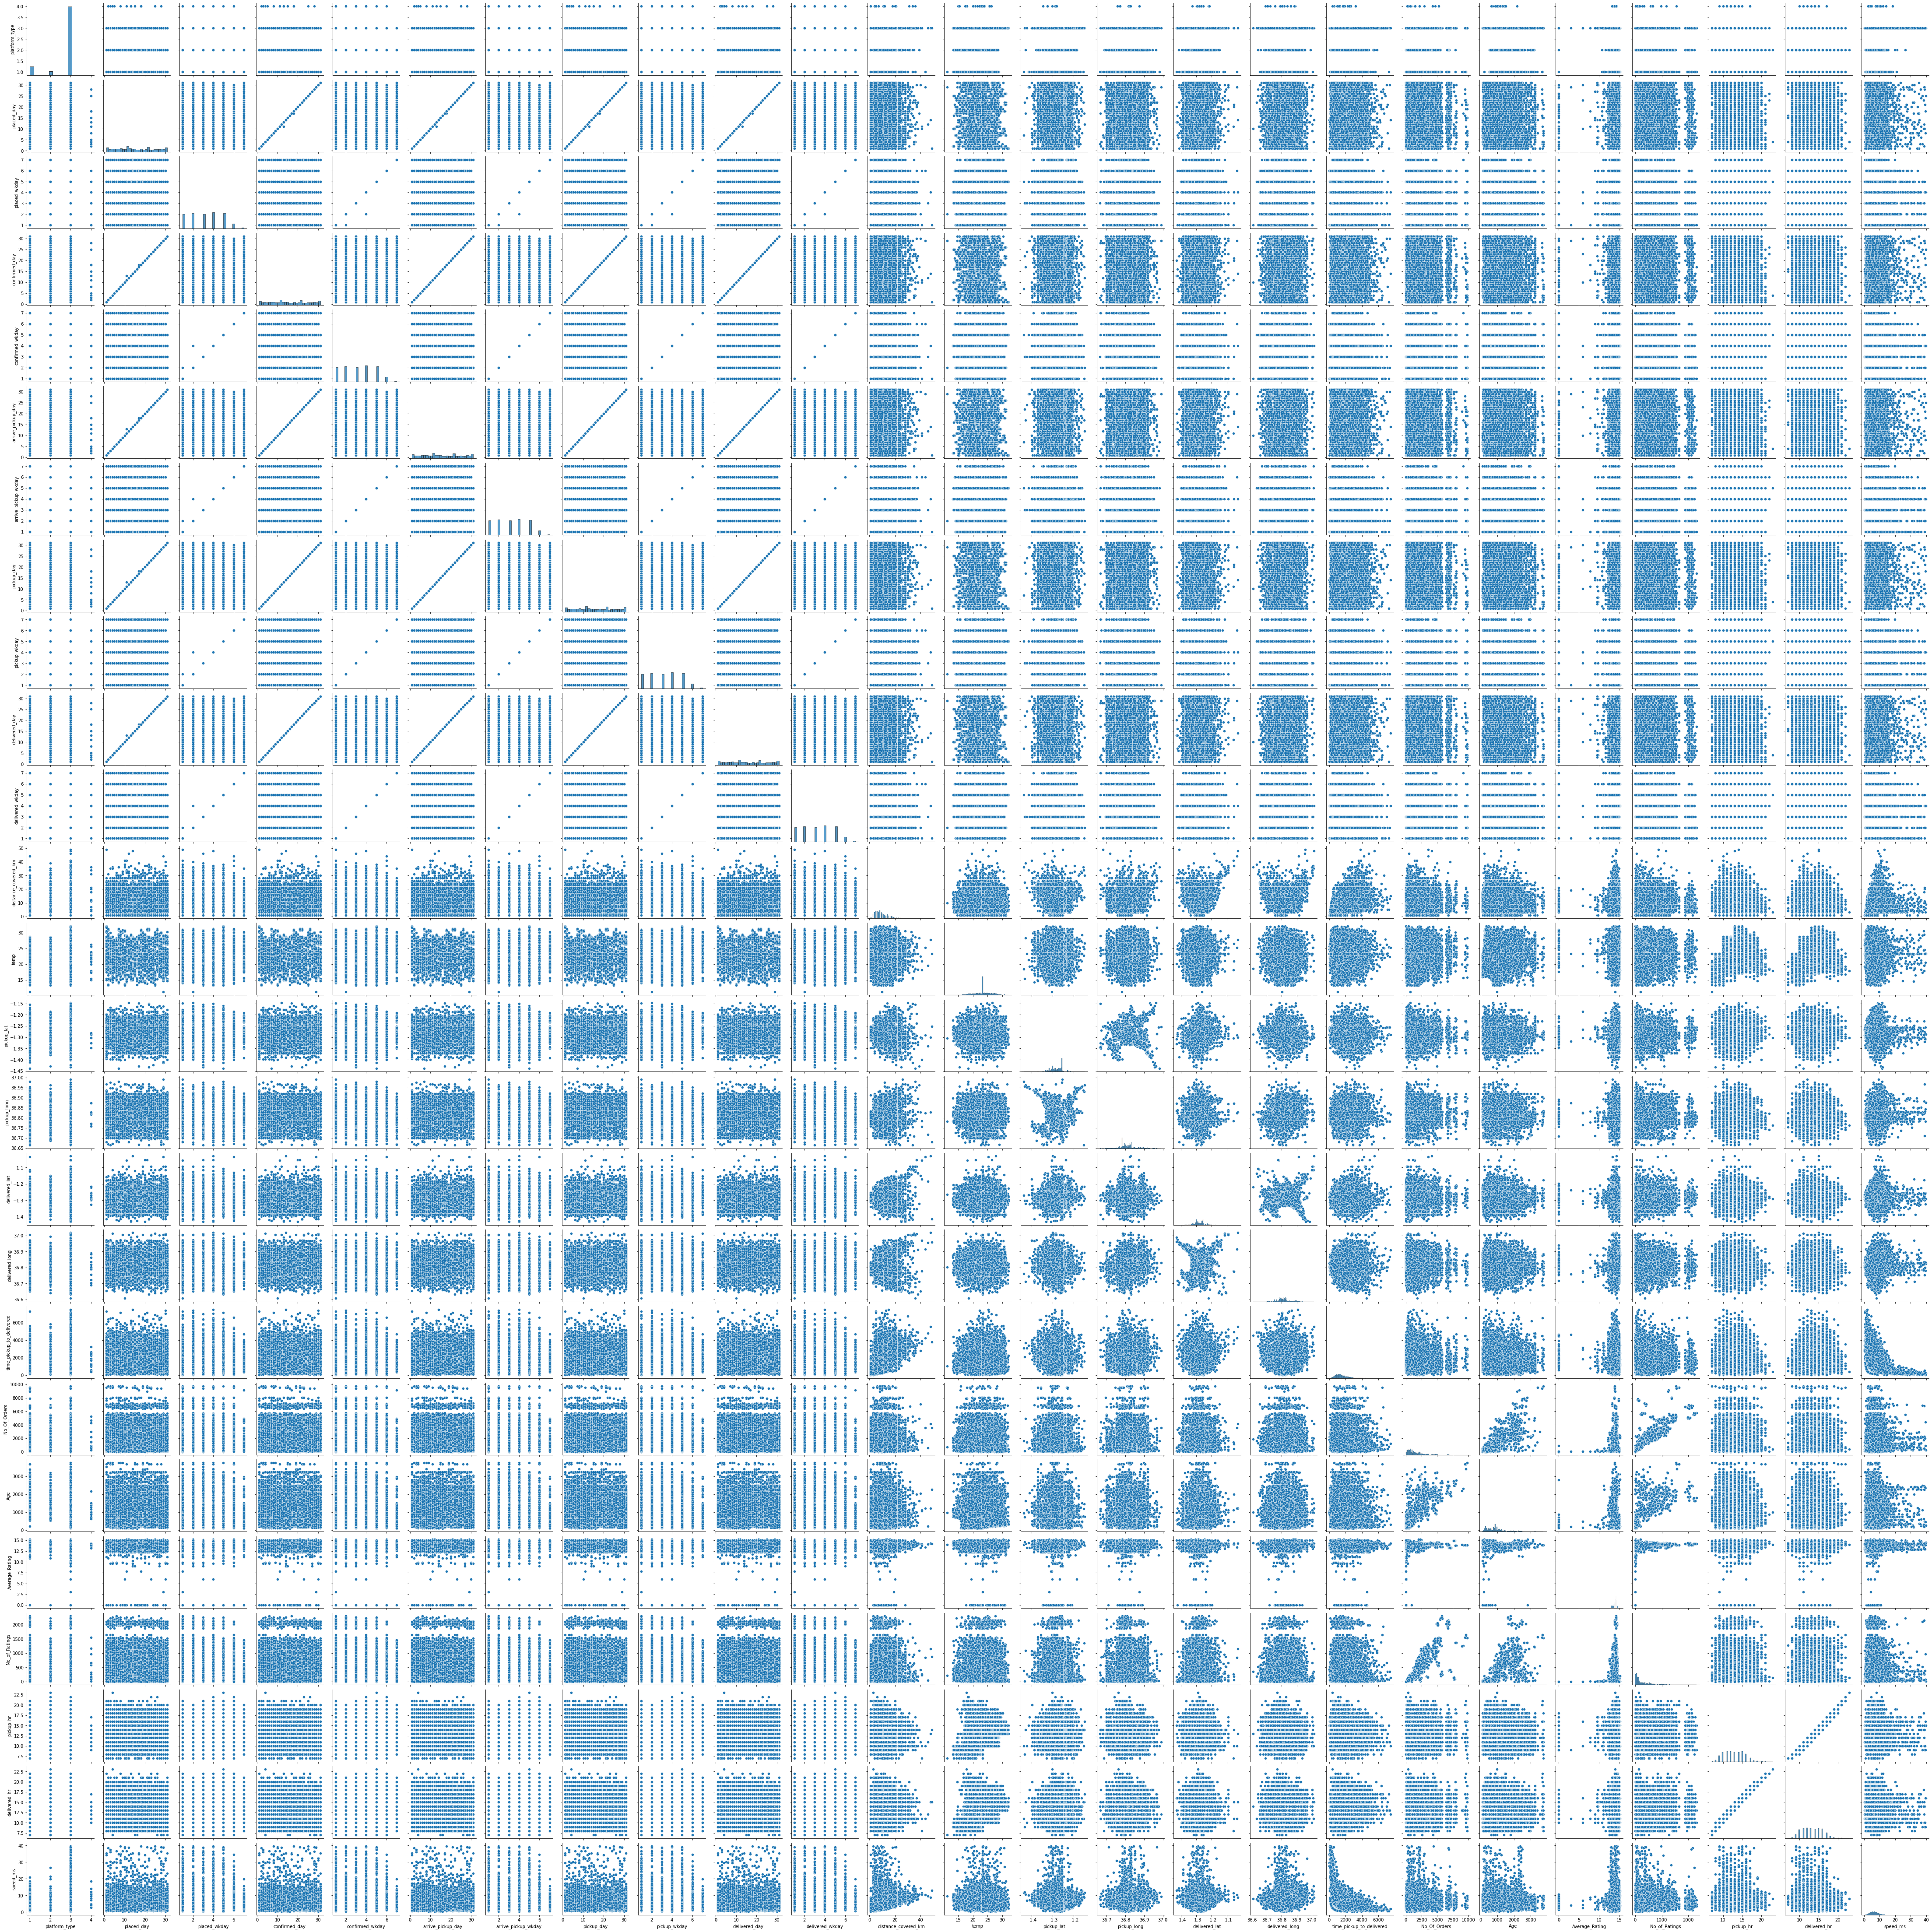

In [12]:
sns.pairplot(train)